<a href="https://colab.research.google.com/github/qndbsxo/Data-Analysis/blob/main/Projects/3.CCTV/3_a_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_CCTV%EC%84%A4%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON PROGRAMMING


In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# 한글사용코드 
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 실습 1. CCTV_in_Seoul.csv 파일을 pandas 로 읽어오세요.


In [3]:
df_cctv_seoul = pd.read_csv('/content/CCTV_in_Seoul.csv') # csv파일 불러오기
df_cctv_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


## 실습 2. 컬럼 중 "기관명" 컬럼명을 "구별" 로 이름을 바꾸세요.

In [4]:
df_cctv_seoul = df_cctv_seoul.rename(columns={"기관명":"구별"}) # 컬럼명 변경

## 실습 3. population_in_Seoul.xls 파일을 읽으세요. 


In [5]:
df_pop_seoul = pd.read_excel('/content/population_in_Seoul.xls',)
df_pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


## 실습 4.population_in_Seoul.xls 파일을 읽으세요.
### header 는 3번째 row 로 사용할 것입니다. 따라서 header = 2  로 셋팅하세요.
### 엑셀파일의 컬럼은  B, D, G, J, N 만 사용할 것입니다.


In [6]:
df_pop_seoul = pd.read_excel('population_in_Seoul.xls', # 엑셀파일 불러오기
                         header=2,                            # 2번째 로우를 컬럼명으로 지정
                         usecols='B, D, G, J, N') # 사용할 컬럼 선택

## 실습 5-1. pop_Seoul 의 컬럼명을 모두 출력하세요.

In [7]:
df_pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

## 실습 5-2. 컬럼명을 다음처럼 바꿉니다.
### 0번째는 '구별' , 1번째는 '인구수', 2번쨰는 '한국인', 3번째는 '외국인', 4번째는 '고령자'  로 rename

In [8]:
df_pop_seoul = df_pop_seoul.rename(columns={"자치구":'구별', '계':'인구수', "계.1":'한국인', '계.2':'외국인', '65세이상고령자':'고령자'}) # 컬럼명 변경
df_pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


## 실습 6. CCTV 갯수가 가장 많은 순부터 적은 순으로 정렬한 후, 상위 20개만 화면에 보여주세요.

In [9]:
df_cctv_seoul.sort_values(by='소계', ascending=False).head(20) # cctv 갯수 순으로 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


## 실습 7. 최근 3년간 CCTV 증가율을 계산하여, dataframe 에 '최근증가율' 컬럼을 추가하세요.
### 증가율 계산  :  (2016 + 2015 + 2014) / 2013이전 * 100

In [10]:
# 최근 3년간  cctv 증가율
df_cctv_seoul['최근증가율'] = ( df_cctv_seoul['2016년'] + df_cctv_seoul['2015년'] + df_cctv_seoul['2014년'] ) / df_cctv_seoul['2013년도 이전'] * 100

In [11]:
df_cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


## 실습 8. 최근 3년간 CCTV 증가율이 가장 높은 순으로 5개의 구를 찾으세요.

In [12]:
df_cctv_seoul.sort_values(by='최근증가율', ascending=False).head() # cctv증가율을 기준으로 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 실습 9. 서울시의 인구 데이터 중, 가장 첫번째 로우(row) 는 필요 없으니, 삭제하세요.

In [13]:
df_pop_seoul = df_pop_seoul.drop(axis=0, index=0) # 첫 번째 row 삭제

In [14]:
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


## 실습 9. 서울시의 인구 데이터 중, NaN이 있는지 확인하고, NaN이 있으면 해당 row를 삭제하세요.

In [15]:
df_pop_seoul.isna().sum() # Check for missing values
df_pop_seoul = df_pop_seoul.dropna() # Delete for missing values

## 실습 10. '외국인비율' 과 '고령자비율' 두개의 컬럼을 추가하세요.
### 외국인비율 = 외국인 수 / 인구수 * 100
### 고령자비율 = 고령자 수 / 인구수 * 100

In [16]:
df_pop_seoul['외국인비율'] = df_pop_seoul['외국인'] / df_pop_seoul['인구수'] * 100
df_pop_seoul['고령자비율'] = df_pop_seoul['고령자'] / df_pop_seoul['인구수'] * 100

In [17]:
df_pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


## 실습 11. 외국인 대상으로 장사를 하려 합니다. 외국인이 가장 많은 구와, 외국인비율이 가장 높은 구를 각각 5개씩 찾으세요.

In [18]:
# 외국인이 가장 많은 구
df_pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [19]:
df_pop_seoul.sort_values(by='외국인비율', ascending=False).head() # 외국인 비율이 가장 높은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## 실습 12. 고령자 대상 마케팅을 구상 중입니다. 고령자가 가장 많은 구와, 고령자비율이 가장 높은 구를 각각 5개씩 찾으세요.

In [20]:
df_pop_seoul.sort_values(by='고령자', ascending=False).head() # 고령자 많은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [21]:
df_pop_seoul.sort_values(by='고령자비율', ascending=False).head() # 고령자 비율이 높은 구

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 실습 13. CCTV 데이터와 인구 데이터 합치고 분석하기

In [22]:
data_result = pd.merge(left=df_pop_seoul, right=df_cctv_seoul, on='구별', how='inner') # 두 데이터프레임 병합

## 실습 14. data_result 에서, 다음 4개의 컬럼을 모두 버려 버립니다.
### '2013년도 이전', 2014년', '2015년', '2016년' 

In [23]:
data_result = data_result.drop(columns=['2013년도 이전', '2014년', '2015년', '2016년']) # 컬럼 삭제

## 실습 15-1. dara_result 의 인덱스를, '구별' 로 바꿔 줍니다.

In [24]:
data_result = data_result.set_index(keys='구별') # 구별을 인덱스로 설정

## 실습 15-2. 이 데이터프레임을 csv 파일로 저장합니다.
### 파일명은, CCTV_result.csv 입니다.

In [25]:
data_result.to_csv('CCTV_result.csv')

## 실습 16. 상관 관계 분석에 대해서 알아봅니다.
### https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
###  상관계수는 -1부터 1까지의 값을 갖는다.1일 때 완벽한 양의 상관관계가 되고, -1일 때 완벽한 음의 상관관계가 된다. 0이라면 별다른 상관관계가 없음을 의미한다.
###  상관계수가 0.1 이하면 관계가 없고, 0.3 이하면 약한관계 입니다

## 실습 17. CCTV의 갯수와 고령자 비율의 상관관계를 분석하세요.

In [26]:
data_result[['소계', '고령자비율']].corr() # 상관관계 분석

,소계,고령자비율
소계,1.000000,-0.280786
고령자비율,-0.280786,1.000000


## 실습 18. CCTV의 갯수와 외국인 비율의 상관관계를 분석하세요.

In [27]:
data_result[['소계', '외국인비율']].corr() # 상관관계 분석

,소계,외국인비율
소계,1.000000,-0.136074
외국인비율,-0.136074,1.000000


## 실습 19. CCTV의 갯수와 인구수의 상관관계를 분석하세요.

In [28]:
data_result[['소계', '인구수']].corr() # 상관관계 분석

,소계,인구수
소계,1.000000,0.306342
인구수,0.306342,1.000000


## 실습 20. 각 구의 CCTV의 갯수를 bar로 나타내세요.
### pandas dataframe.plot 함수 사용

<Figure size 1080x576 with 0 Axes>

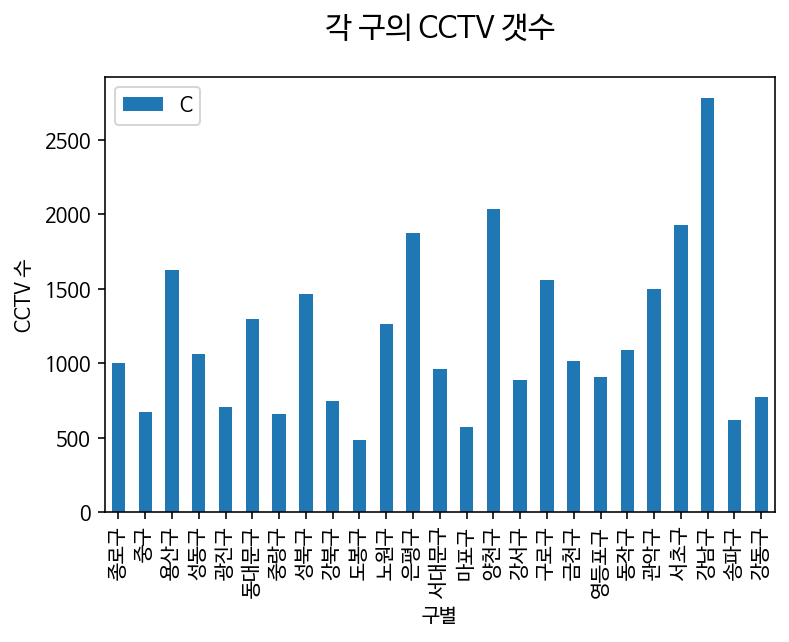

In [29]:
plt.figure(figsize=(15,8))
data_result.reset_index().plot.bar(x='구별', y='소계') # 각 구별 cctv 갯수
plt.title('각 구의 CCTV 갯수', fontsize=15, pad=20) # 제목
plt.legend('CCTV', loc=2) # 범례
plt.ylabel('CCTV 수') # y축 라벨
plt.show()

## 실습 21. 각 구의 CCTV의 갯수를, 먼저 소팅(큰순)한 후,  bar로 나타내세요.

<Figure size 1080x576 with 0 Axes>

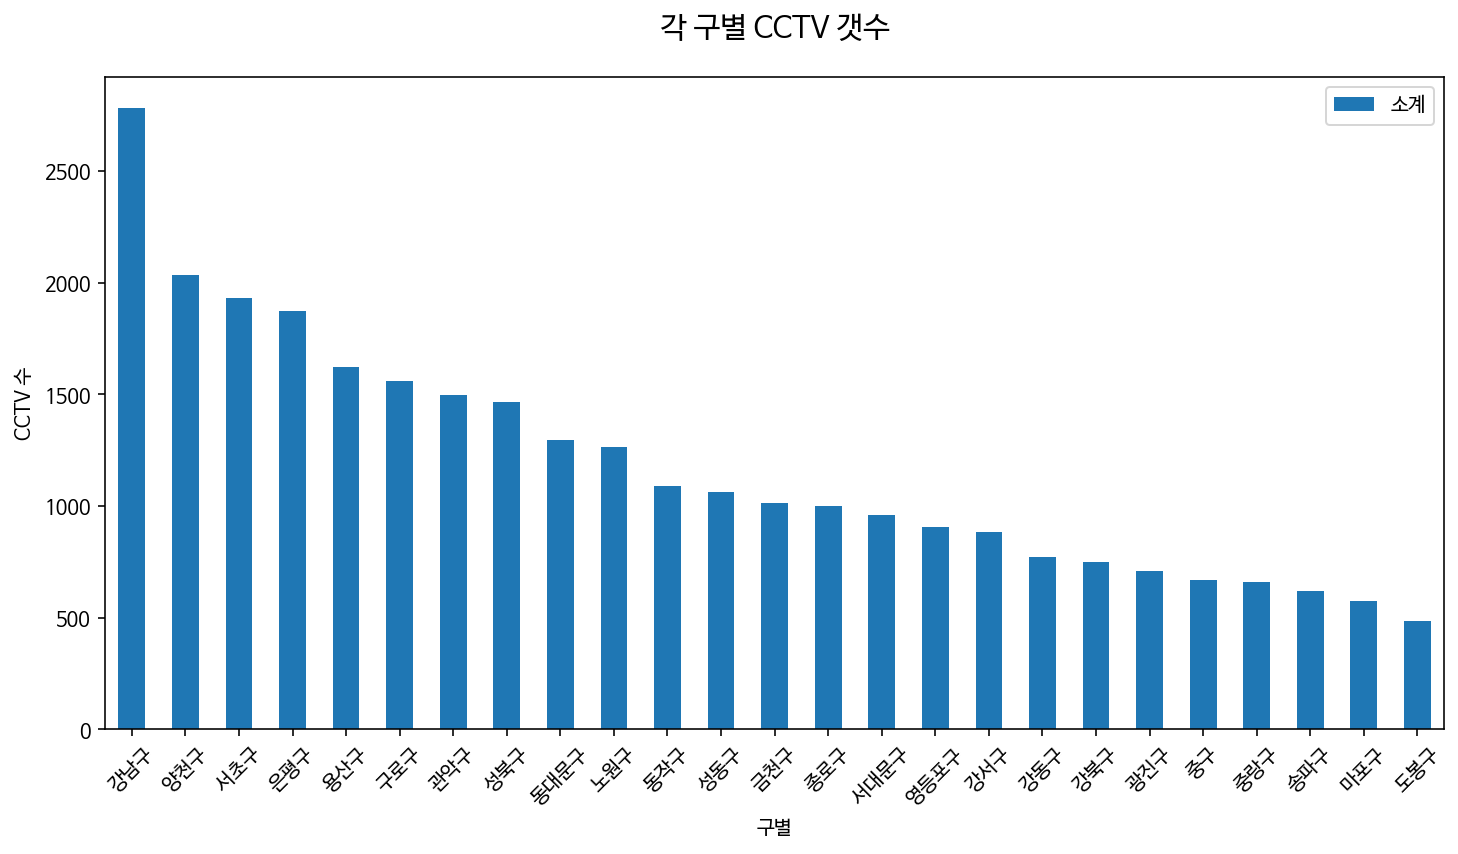

In [30]:
plt.rcParams['figure.figsize'] = (12, 6) # 그래프 크기 조절
plt.figure(figsize=(15,8)) 
data_result.reset_index().sort_values(by='소계',ascending=False).plot.bar(x='구별', y='소계') # 각 구별 cctv 갯수
plt.title('각 구별 CCTV 갯수', fontsize=15, pad=20) # 타이틀, 제목폰트 크기, 위치조절
plt.ylabel('CCTV 수') # y라벨 설정
plt.xticks(rotation=45) # x축 
plt.show()

## 실습 22. 인구 한명당 CCTV의 비율을 계산하고, 이를 각 구별로 CCTV비율이 얼마인지 bar로 나타내세요.

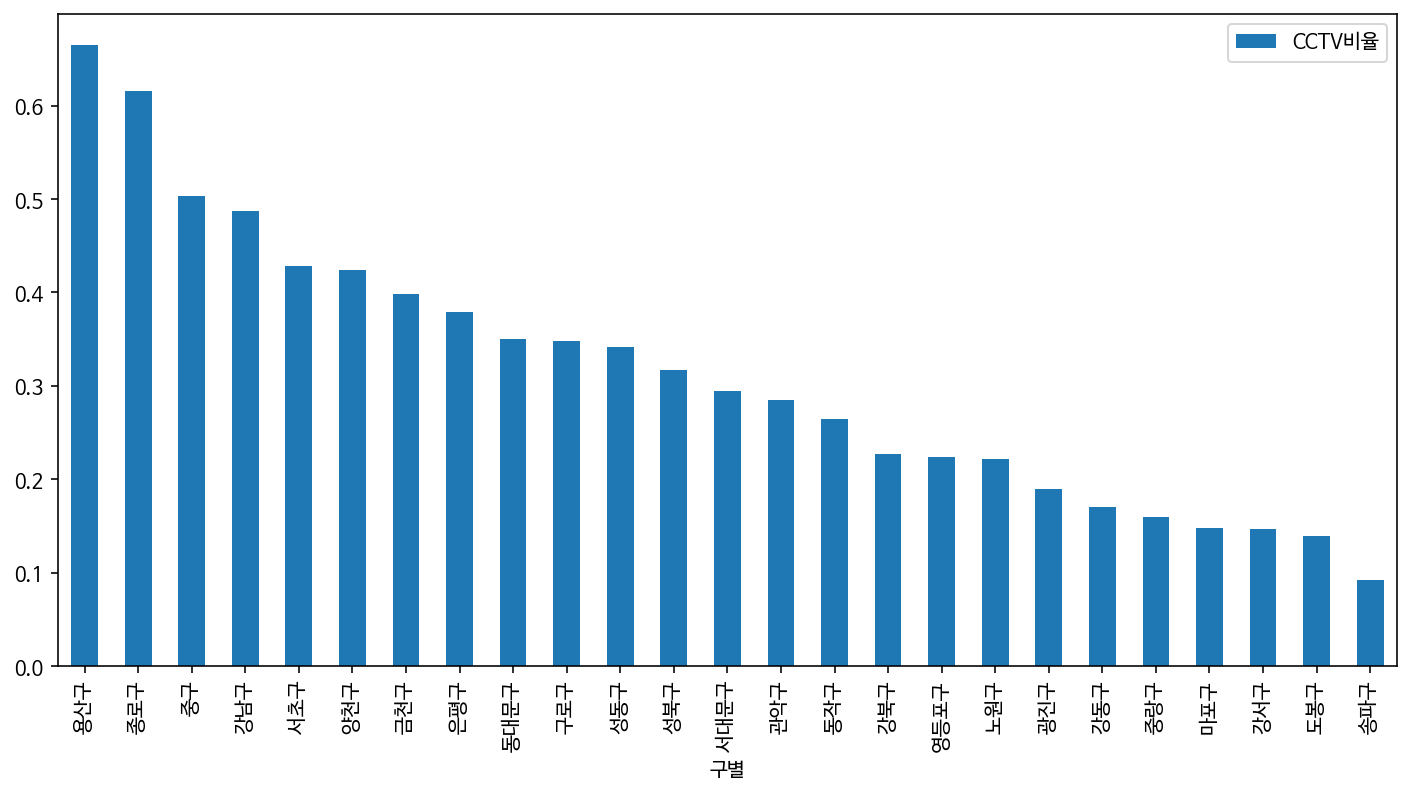

In [31]:
data_result['CCTV비율']= data_result['소계'] / data_result['인구수'] *100 # cctv비율
data_result.reset_index().sort_values(by='CCTV비율', ascending=False).plot.bar(x='구별', y='CCTV비율') # for plotting

## 실습 23. 인구수와 CCTV갯수가 어떤 분포인지, scatter로 나타내세요.

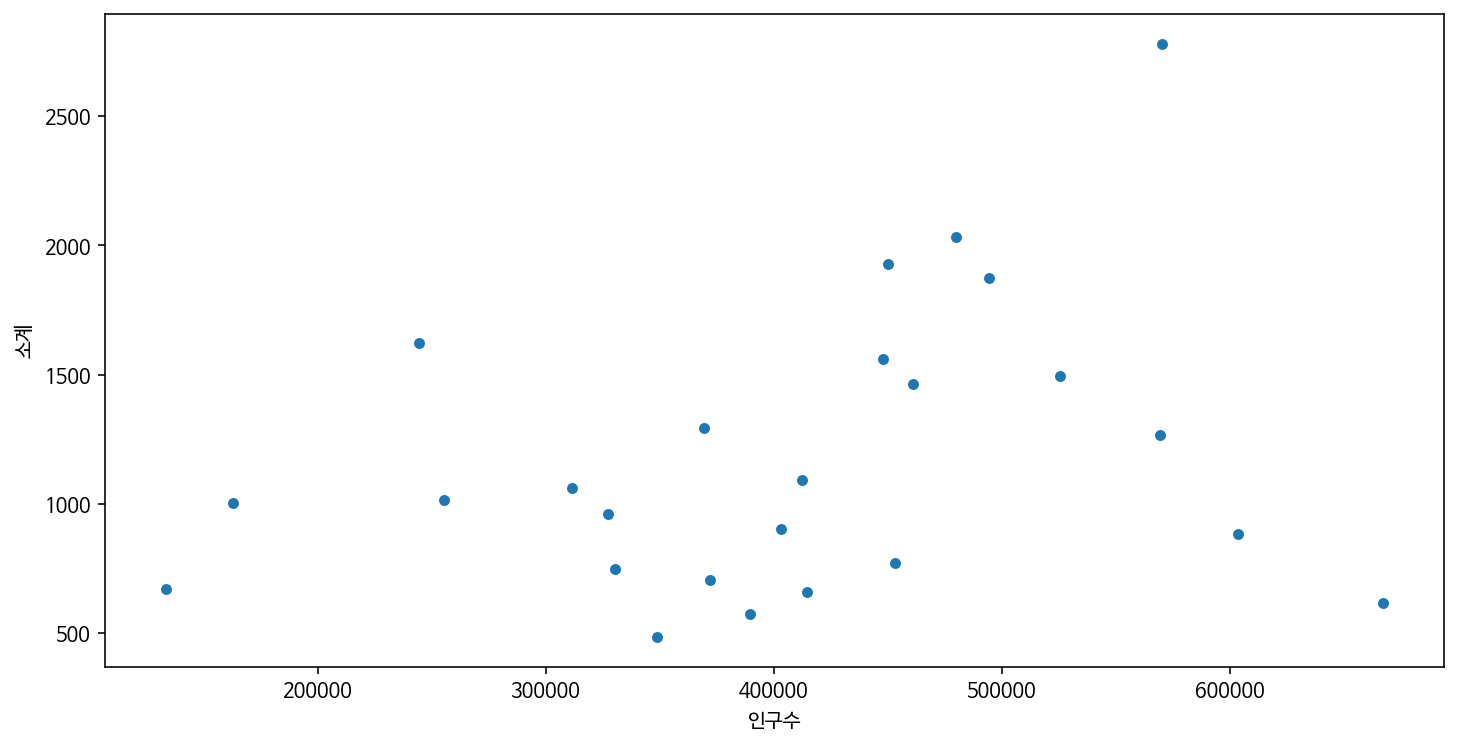

In [32]:
data_result.plot.scatter(x='인구수', y='소계')
plt.show()